In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced


In [2]:
import pickle
with open('CreditCardFraudDataCleaned.pkl', 'rb') as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()
    
# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
df = CreditCardFraudDataFromPickle
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,Hour,Day,amount_log,amount_scaled,amount_minmax
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008166,1.245932,0.343962
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,0,1,0.993252,-0.649372,0.006184
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936665,4.200403,0.870503
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816322,0.909000,0.283915
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,0,1,4.248495,0.218755,0.160900


In [3]:
df.shape

(273441, 36)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,Hour,Day,amount_log,amount_scaled,amount_minmax
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008166,1.245932,0.343962
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,0,1,0.993252,-0.649372,0.006184
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936665,4.200403,0.870503
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816322,0.909000,0.283915
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,0,1,4.248495,0.218755,0.160900


In [5]:
X = df.drop(['Time','Class','Hour','Day','Amount','amount_minmax','amount_scaled'],axis=1)
y = df['Class']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (191408, 29)
y_train -  (191408,)
X_test -  (82033, 29)
y_test -  (82033,)


# LOGISTIC REGRESSION ON IMBALANCED DATASET

In [7]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [8]:
from sklearn import metrics
y_pred=LR.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81897
           1       0.87      0.62      0.72       136

    accuracy                           1.00     82033
   macro avg       0.93      0.81      0.86     82033
weighted avg       1.00      1.00      1.00     82033



In [9]:
accuracy_score(y_test,y_pred)

0.9992076359513854

In [10]:
f1_score(y_test,y_pred)

0.7210300429184548

Text(0.5, 15.0, 'Predicted')

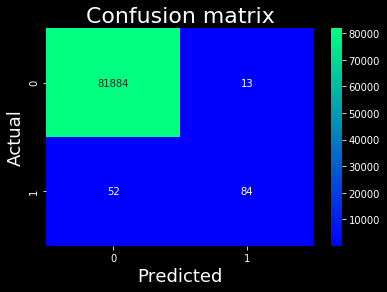

In [11]:
cnf_matrix=(confusion_matrix(y_test,y_pred))
sns.heatmap(pd.DataFrame(cnf_matrix),cmap='winter',annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

In [12]:
metrics.roc_auc_score(y_test , y_pred) 

0.8087441614251474

In [13]:
from sklearn import metrics
def buildROC(y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

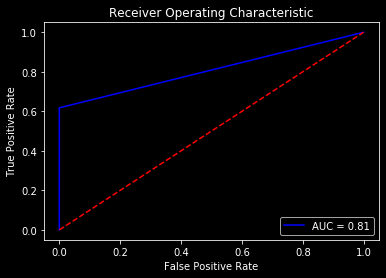

In [14]:
buildROC(y_test, y_pred)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


# LR USING RANDOM UNDERSAMPLING

In [16]:
rus=RandomUnderSampler(random_state=42)
X_rus,y_rus=rus.fit_resample(X,y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=0)

In [18]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.933579335793358

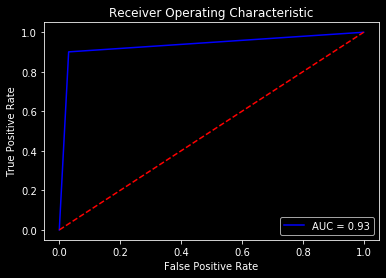

In [20]:
buildROC(y_test, y_pred)

Text(0.5, 15.0, 'Predicted')

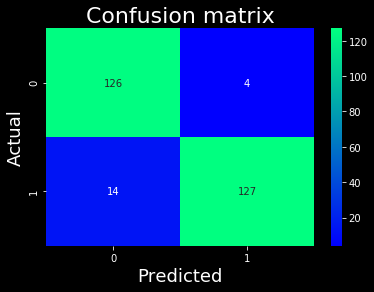

In [21]:
cnf_matrix=(confusion_matrix(y_test,y_pred))
sns.heatmap(pd.DataFrame(cnf_matrix),cmap='winter',annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# LR USING RANDOM OVERSAMPLING

In [22]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

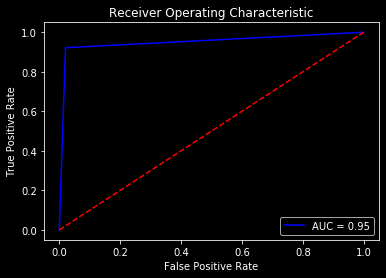

In [24]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
buildROC(y_test, y_pred)


Text(0.5, 15.0, 'Predicted')

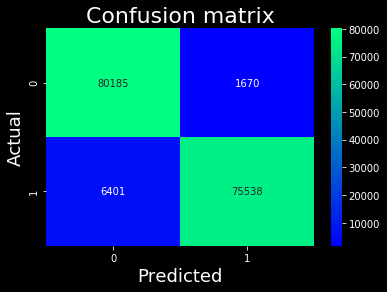

In [25]:
cnf_matrix=(confusion_matrix(y_test,y_pred))
sns.heatmap(pd.DataFrame(cnf_matrix),cmap='winter',annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# LR USING SMOTE

In [26]:
from imblearn.over_sampling import SMOTE, ADASYN
smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X,y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

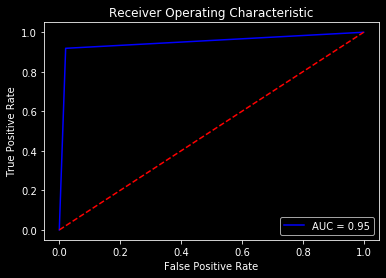

In [28]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
buildROC(y_test, y_pred)


Text(0.5, 15.0, 'Predicted')

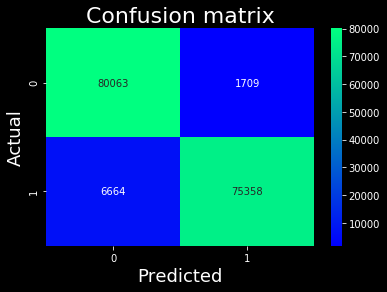

In [29]:
cnf_matrix=(confusion_matrix(y_test,y_pred))
sns.heatmap(pd.DataFrame(cnf_matrix),cmap='winter',annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# LR USING ADASYN

In [30]:
adasyn=ADASYN(random_state=0)
X_adasyn,y_adasyn=adasyn.fit_resample(X,y)

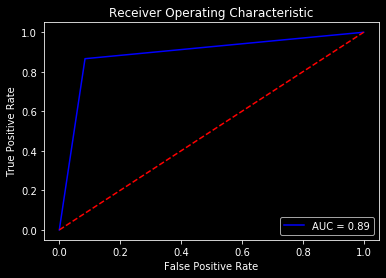

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0)
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
buildROC(y_test, y_pred)


Text(0.5, 15.0, 'Predicted')

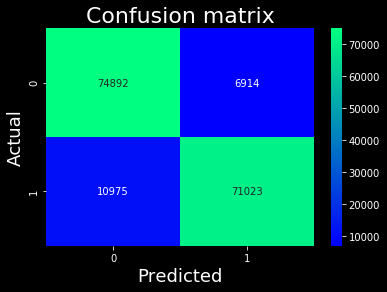

In [32]:
cnf_matrix=(confusion_matrix(y_test,y_pred))
sns.heatmap(pd.DataFrame(cnf_matrix),cmap='winter',annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# USING PCA TO VISUALISE DATA IN 2D

In [33]:
from sklearn.decomposition import PCA

In [34]:
X_pca=PCA(n_components=2,random_state=42).fit_transform(X)
X_pca.size


546882

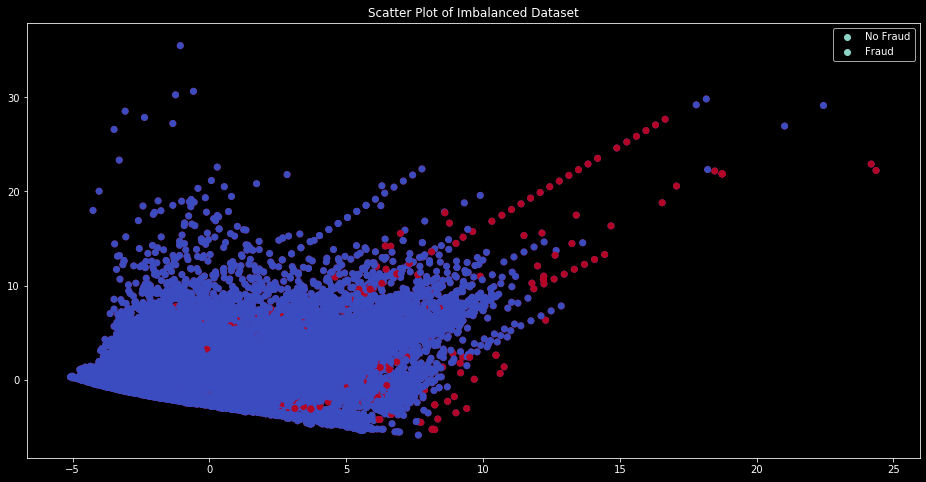

In [35]:
plt.figure(figsize=(16,8))

plt.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), label='No Fraud', cmap='coolwarm', linewidths=1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), label='Fraud', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

In [36]:
X_pca_adasyn=PCA(n_components=2,random_state=42).fit_transform(X_adasyn)


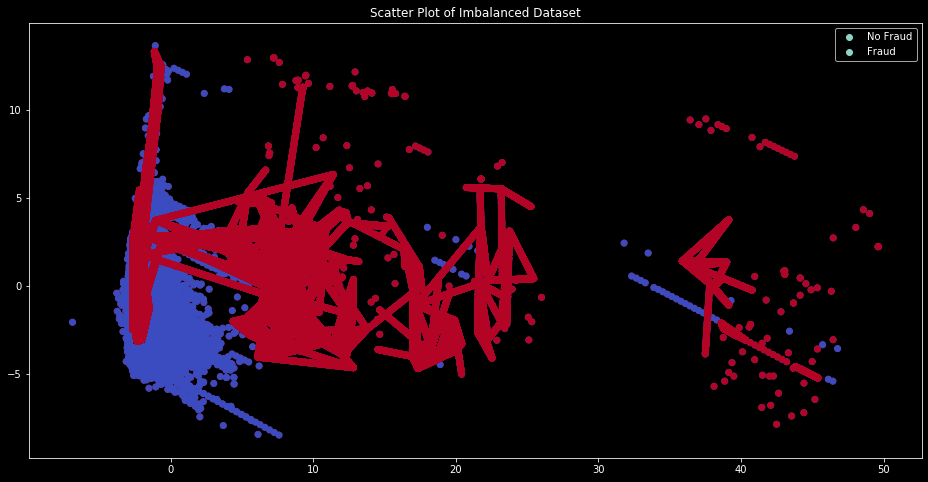

In [37]:
plt.figure(figsize=(16,8))

plt.scatter(X_pca_adasyn[:,0], X_pca_adasyn[:,1], c=(y_adasyn == 0), label='No Fraud', cmap='coolwarm', linewidths=1)
plt.scatter(X_pca_adasyn[:,0], X_pca_adasyn[:,1], c=(y_adasyn == 1), label='Fraud', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

# TRAIN TEST SPLITS FOR BALANCED DATASET

In [38]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

In [39]:
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

In [40]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

In [41]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0)

In [42]:
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
#CREATING A LIST OF MODELS WITH THEIR ACCURACY, RECALL AND F1 SCORES
names_lst = []
aucs_lst = []
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []


In [44]:

def build_measure_model(models):
    plt.figure(figsize=(12,6))
    
    #TRAINING MODEL, PREDICTING AND GENERATING SCORES FOR ALL MODELS IN THE LIST
    for name, model,Xdata,ydata in models:
        
        names_lst.append(name)
        
        X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
         # calculate accuracy
        Accuracy = metrics.accuracy_score(y_pred , y_test)
        accuracy_lst.append(Accuracy)

        # calculate auc
        Aucs = metrics.roc_auc_score(y_test , y_pred)
        aucs_lst.append(Aucs)

        # calculate precision
        PrecisionScore = metrics.precision_score(y_test , y_pred)
        precision_lst.append(PrecisionScore)

        # calculate recall
        RecallScore = metrics.recall_score(y_test , y_pred)
        recall_lst.append(RecallScore)

        # calculate f1 score
        F1Score = metrics.f1_score(y_test , y_pred)
        f1_lst.append(F1Score)
        
        cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
        
        print("Model Name :", name)
        print('Accuracy :{0:0.5f}'.format(Accuracy)) 
        print('AUC : {0:0.5f}'.format(Aucs))
        print('Precision : {0:0.5f}'.format(PrecisionScore))
        print('Recall : {0:0.5f}'.format(RecallScore))
        print('F1 : {0:0.5f}'.format(F1Score))
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
        auc = metrics.roc_auc_score(y_test, y_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
        
        
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

# LOGISTIC REGRESSION MODELS FOR ALL DATASETS

Model Name : LR imbalance
Accuracy :0.99926
AUC : 0.81978
Precision : 0.87879
Recall : 0.63971
F1 : 0.74043
Confusion Matrix : 
 [[81885    12]
 [   49    87]]


Model Name : LR Undersampling
Accuracy :0.93358
AUC : 0.93497
Precision : 0.96947
Recall : 0.90071
F1 : 0.93382
Confusion Matrix : 
 [[126   4]
 [ 14 127]]


Model Name : LR Oversampling
Accuracy :0.95090
AUC : 0.95095
Precision : 0.97897
Recall : 0.92175
F1 : 0.94950
Confusion Matrix : 
 [[80148  1624]
 [ 6418 75604]]


Model Name : LR SMOTE
Accuracy :0.94889
AUC : 0.94894
Precision : 0.97784
Recall : 0.91877
F1 : 0.94738
Confusion Matrix : 
 [[80064  1708]
 [ 6663 75359]]


Model Name : LR ADASYN
Accuracy :0.89180
AUC : 0.89183
Precision : 0.91157
Recall : 0.86807
F1 : 0.88929
Confusion Matrix : 
 [[74901  6905]
 [10818 71180]]




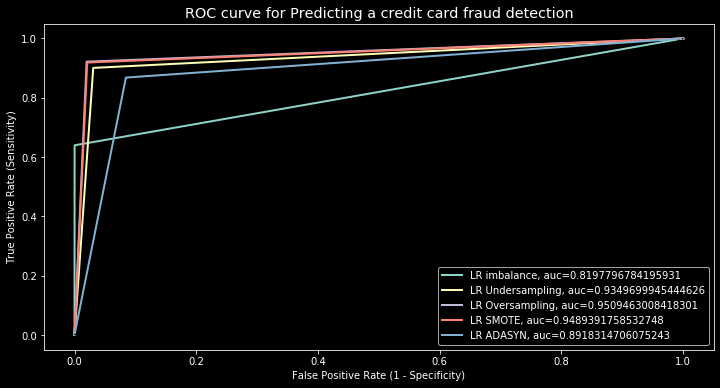

In [45]:
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_under,y_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_over,y_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_smote,y_smote))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

# RANDOM FOREST  FOR ALL DATASETS

Model Name : RF imbalance
Accuracy :0.99961
AUC : 0.90438
Precision : 0.94828
Recall : 0.80882
F1 : 0.87302
Confusion Matrix : 
 [[81891     6]
 [   26   110]]


Model Name : RF Undersampling
Accuracy :0.93727
AUC : 0.93912
Precision : 0.98438
Recall : 0.89362
F1 : 0.93680
Confusion Matrix : 
 [[128   2]
 [ 15 126]]


Model Name : RF Oversampling
Accuracy :0.99994
AUC : 0.99994
Precision : 0.99988
Recall : 1.00000
F1 : 0.99994
Confusion Matrix : 
 [[81762    10]
 [    0 82022]]


Model Name : RF SMOTE
Accuracy :0.99988
AUC : 0.99988
Precision : 0.99977
Recall : 1.00000
F1 : 0.99988
Confusion Matrix : 
 [[81753    19]
 [    0 82022]]


Model Name : RF ADASYN
Accuracy :0.99987
AUC : 0.99987
Precision : 0.99976
Recall : 0.99999
F1 : 0.99987
Confusion Matrix : 
 [[81786    20]
 [    1 81997]]




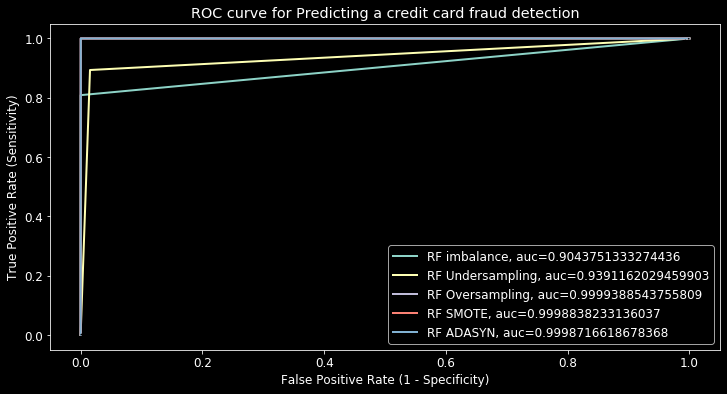

In [46]:
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_under,y_under))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_over,y_over))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_smote,y_smote))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

# DECISION TREE

Model Name : DT imbalance
Accuracy :0.99913
AUC : 0.87110
Precision : 0.73723
Recall : 0.74265
F1 : 0.73993
Confusion Matrix : 
 [[81861    36]
 [   35   101]]


Model Name : DT Undersampling
Accuracy :0.92620
AUC : 0.92668
Precision : 0.94161
Recall : 0.91489
F1 : 0.92806
Confusion Matrix : 
 [[122   8]
 [ 12 129]]


Model Name : DT Oversampling
Accuracy :0.99978
AUC : 0.99978
Precision : 0.99956
Recall : 1.00000
F1 : 0.99978
Confusion Matrix : 
 [[81736    36]
 [    0 82022]]


Model Name : DT SMOTE
Accuracy :0.99828
AUC : 0.99828
Precision : 0.99760
Recall : 0.99898
F1 : 0.99829
Confusion Matrix : 
 [[81575   197]
 [   84 81938]]


Model Name : DT ADASYN
Accuracy :0.99878
AUC : 0.99878
Precision : 0.99810
Recall : 0.99946
F1 : 0.99878
Confusion Matrix : 
 [[81650   156]
 [   44 81954]]




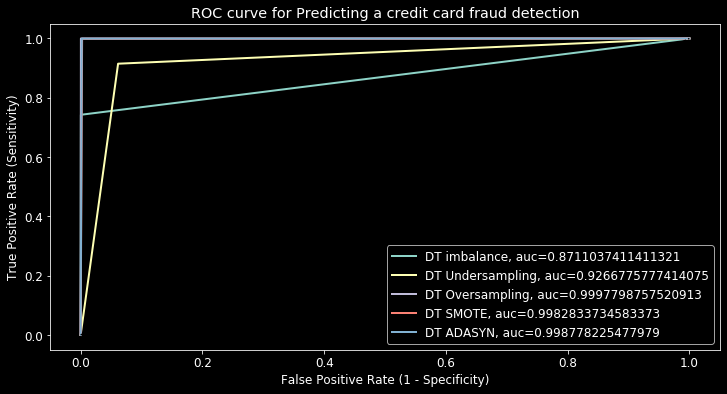

In [47]:
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt,X_under,y_under))
DTmodels.append(('DT Oversampling', dt,X_over,y_over))
DTmodels.append(('DT SMOTE', dt,X_smote,y_smote))
DTmodels.append(('DT ADASYN', dt,X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

# NAIVE BAYES

Model Name : NB imbalance
Accuracy :0.97880
AUC : 0.91598
Precision : 0.06322
Recall : 0.85294
F1 : 0.11771
Confusion Matrix : 
 [[80178  1719]
 [   20   116]]


Model Name : NB Undersampling
Accuracy :0.92989
AUC : 0.93172
Precision : 0.97656
Recall : 0.88652
F1 : 0.92937
Confusion Matrix : 
 [[127   3]
 [ 16 125]]


Model Name : NB Oversampling
Accuracy :0.92797
AUC : 0.92804
Precision : 0.97374
Recall : 0.87989
F1 : 0.92444
Confusion Matrix : 
 [[79826  1946]
 [ 9852 72170]]


Model Name : NB SMOTE
Accuracy :0.92412
AUC : 0.92420
Precision : 0.97366
Recall : 0.87207
F1 : 0.92007
Confusion Matrix : 
 [[79837  1935]
 [10493 71529]]


Model Name : NB ADASYN
Accuracy :0.73531
AUC : 0.73557
Precision : 0.92066
Recall : 0.51568
F1 : 0.66108
Confusion Matrix : 
 [[78162  3644]
 [39713 42285]]




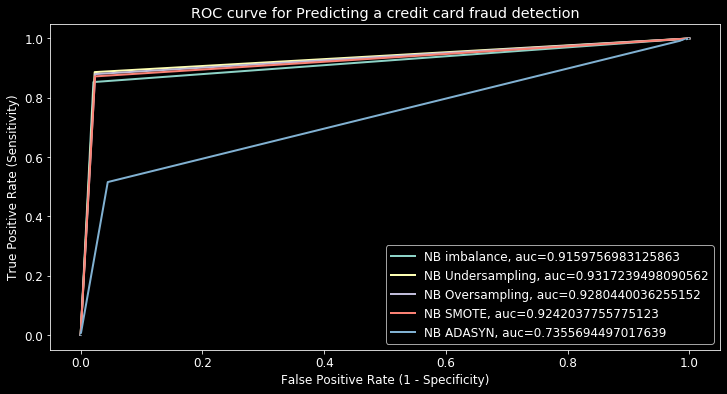

In [48]:
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X,y))
NBmodels.append(('NB Undersampling', GaussianNB(),X_under,y_under))
NBmodels.append(('NB Oversampling', GaussianNB(),X_over,y_over))
NBmodels.append(('NB SMOTE', GaussianNB(),X_smote,y_smote))
NBmodels.append(('NB ADASYN', GaussianNB(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

# MEASURING AND COMPARSION OF ALL MODELS

In [49]:
data = {'Model':names_lst,
       'Accuracy':accuracy_lst,
       'AUC':aucs_lst,
       'PrecisionScore':precision_lst,
       'RecallScore':recall_lst,
       'F1Score':f1_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['AUC','RecallScore','F1Score'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy,AUC,PrecisionScore,RecallScore,F1Score
7,RF Oversampling,0.999939,0.999939,0.999878,1.000000,0.999939
8,RF SMOTE,0.999884,0.999884,0.999768,1.000000,0.999884
9,RF ADASYN,0.999872,0.999872,0.999756,0.999988,0.999872
12,DT Oversampling,0.999780,0.999780,0.999561,1.000000,0.999781
14,DT ADASYN,0.998779,0.998778,0.998100,0.999463,0.998781
13,DT SMOTE,0.998284,0.998283,0.997602,0.998976,0.998288
2,LR Oversampling,0.950902,0.950946,0.978971,0.921753,0.949501
3,LR SMOTE,0.948893,0.948939,0.977837,0.918766,0.947382
6,RF Undersampling,0.937269,0.939116,0.984375,0.893617,0.936803
1,LR Undersampling,0.933579,0.934970,0.969466,0.900709,0.933824
